In [1]:
%matplotlib inline

In [2]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [3]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [4]:
%run $basepath/analysis/analysis_setup.py

/orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
%run $basepath/analysis/selections.py

3348 saturated in near_saturated_f212n_f212n
607 saturated in near_saturated_f466n_f466n
2244 saturated in near_saturated_f405n_f405n
2790 saturated in near_saturated_f187n_f187n
17728 saturated in near_saturated_f182m_f182m
23336 near saturated out of 550107.  That leaves 526771 not near unsaturated
194 saturated in replaced_saturated_f212n
113 saturated in replaced_saturated_f466n
330 saturated in replaced_saturated_f405n
122 saturated in replaced_saturated_f187n
926 saturated in replaced_saturated_f182m
2600 saturated out of 550107.  That leaves 547507 unsaturated
Filter f410m has qf=120663, spread=112235, fracflux=59469 ok, totaling 55909.  There are 550107 total, of which 429739 are masked and 120368 are unmasked. qfmasksum=424528, inverse=125579.
Filter f212n has qf=341100, spread=314213, fracflux=199154 ok, totaling 196841.  There are 550107 total, of which 211882 are masked and 338225 are unmasked. qfmasksum=208985, inverse=341122.
Filter f466n has qf=49445, spread=101520, frac

### In the F410-F466 color, there were two outliers at some point in the past

they shouldn't be there b/c this color is nearly identical to the used 410m405 color, but they're there.

looking at the individual stars, they're both on the edge of a frame

In [6]:
# thse are blue, not saturated, low error, and.... extremely blue?
weird_objects = blue_410_466 & ~any_saturated & ~magerr_gtpt1 & ((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) > -1)
weird_objects.sum()#, basetable['skycoord_f410m'][weird_objects]

736

<Figure size 1200x400 with 0 Axes>

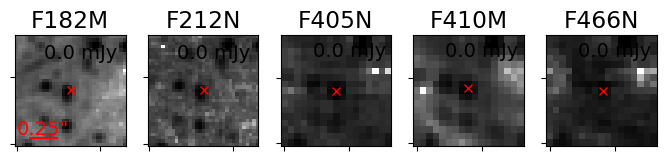

In [7]:
if any(weird_objects):
    # Feb 11, 2023: F410M is offset from 405 & f466?
    starzoom(basetable['skycoord_f410m'][weird_objects][0])

<Figure size 1200x400 with 0 Axes>

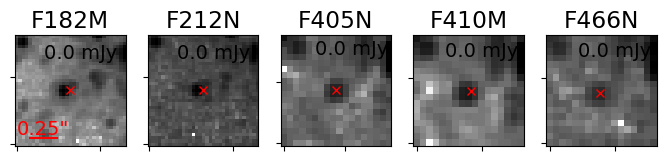

In [8]:
if weird_objects.sum() > 1:
    starzoom(basetable['skycoord_f410m'][weird_objects][1])

### There are also F405-F410 weirdos?

some have excessive color

In [9]:
weird_objects410405 = blue_410_466 & ~any_saturated & ~magerr_gtpt1 & ((basetable['mag_ab_f405n'] - basetable['mag_ab_f410m']) > 2)
weird_objects410405.sum(), basetable['skycoord_f410m'][weird_objects410405][:10]

(5,
 <SkyCoord (ICRS): (ra, dec) in deg
     [(266.52534632, -28.74092332), (266.52947753, -28.74775735),
      (266.53093463, -28.76031399), (266.53791113, -28.7504514 ),
      (266.54854276, -28.73872704), (266.51343285, -28.69862243),
      (266.5130902 , -28.68538742), (266.51483903, -28.70617975),
      (266.51428392, -28.68252885), (266.51766619, -28.75225825)]>)

<Figure size 1200x400 with 0 Axes>

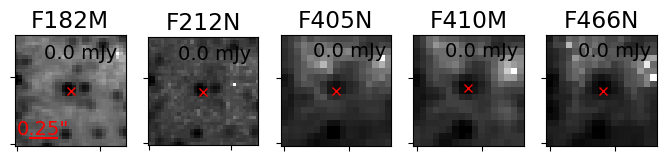

In [10]:
if weird_objects410405.sum() > 0:
    starzoom(basetable['skycoord_f410m'][weird_objects410405][0])

<Figure size 1200x400 with 0 Axes>

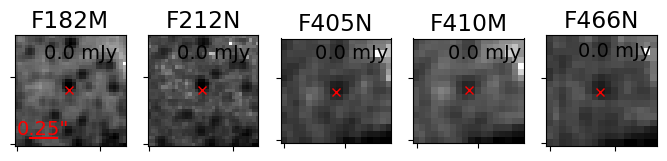

In [11]:
if weird_objects410405.sum() > 1:
    starzoom(basetable['skycoord_f410m'][weird_objects410405][1])

<Figure size 1200x400 with 0 Axes>

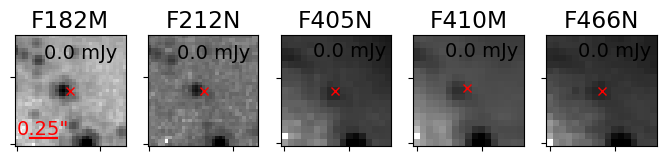

In [12]:
# should be excluded by 'anysaturated'
if weird_objects410405.sum() > 2:
    starzoom(basetable['skycoord_f410m'][weird_objects410405][2])

The above are clearly junk, so we'll exclude them.

<Figure size 1200x400 with 0 Axes>

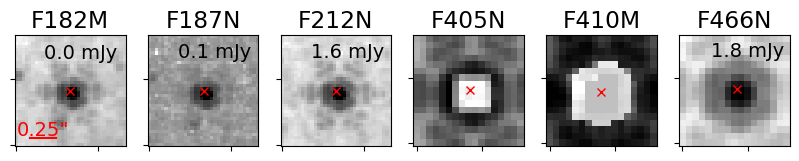

In [13]:
# this star is green in Spitzer 421 and 321 colors
greenstar1 = coordinates.SkyCoord('17:46:08.917 -28:41:22.53', frame='fk5', unit=(u.h, u.deg))
starzoom(greenstar1);

In [14]:
# not sure these are legitimately bad?
# Feb 11, 2023: these are the same objects as 'weird blue' above
badblue = blue_410_466 & ( ((basetable['mag_ab_f405n'] - basetable['mag_ab_f410m']) > 2) |
                          ((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) > -1) )
badblue.sum()

778

In [15]:
import imp, plot_tools
imp.reload(plot_tools)
from plot_tools import starzoom

<Figure size 1200x400 with 0 Axes>

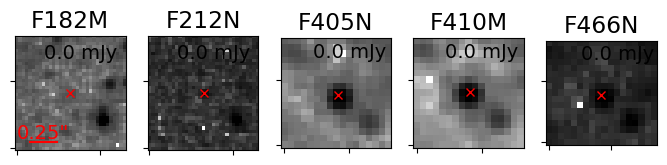

In [16]:
# long-wavelength detected, short-wavelength nondetected?
starzoom(coordinates.SkyCoord(266.54174, -28.74907, unit=(u.deg, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

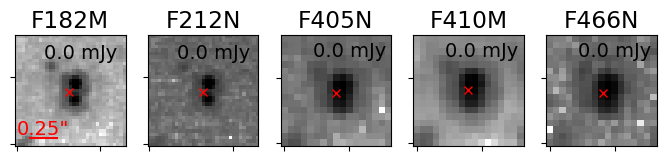

In [17]:
# nice little binary pair
starzoom(coordinates.SkyCoord("17:46:10.006 -28:44:21.00", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

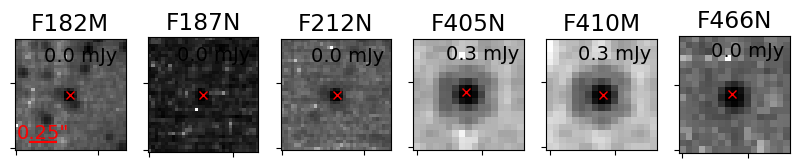

In [18]:
starzoom(coordinates.SkyCoord("17:46:10.678 -28:42:23.73", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

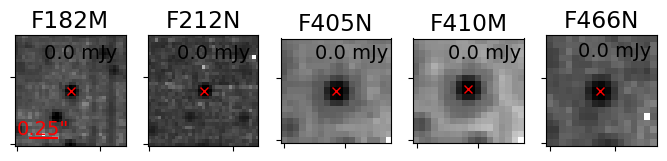

In [19]:
starzoom(coordinates.SkyCoord("17:46:09.303 -28:44:08.85", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

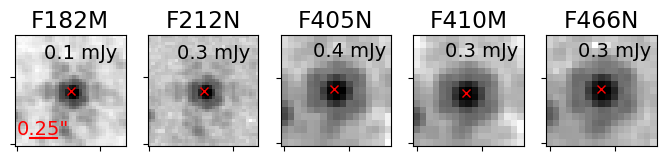

In [20]:
starzoom(coordinates.SkyCoord("17:46:09.25 -28:44:11.05", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

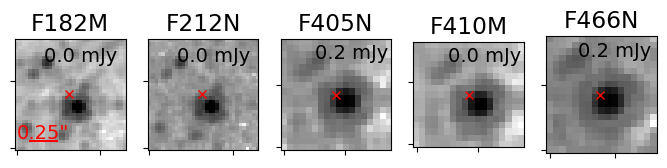

In [21]:
# a few pixels offset as of Feb 11, 2023
starzoom(coordinates.SkyCoord("17:46:03.833 -28:42:59.76", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

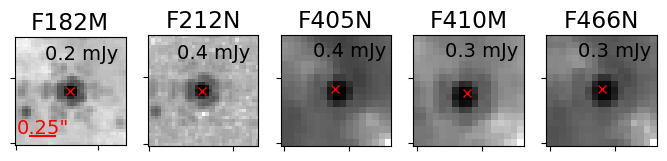

In [22]:
starzoom(coordinates.SkyCoord("17:46:07.373 -28:45:29.28", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

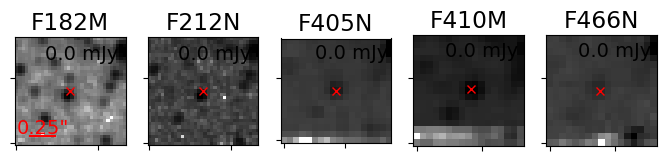

In [23]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][0]);

<Figure size 1200x400 with 0 Axes>

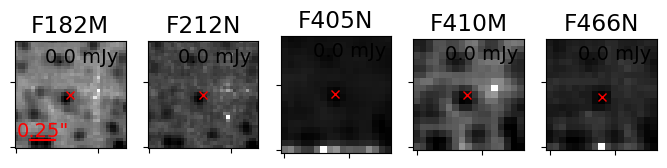

In [24]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][1]);

2 is bad - on an edge

<Figure size 1200x400 with 0 Axes>

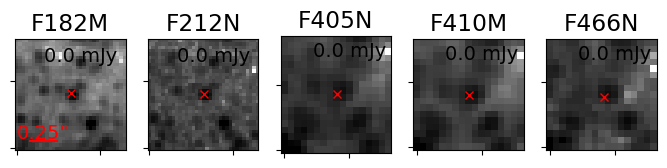

In [25]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][3]);

<Figure size 1200x400 with 0 Axes>

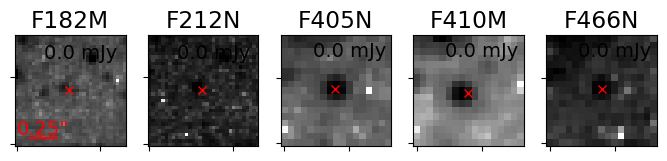

In [26]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][4]);

<Figure size 1200x400 with 0 Axes>

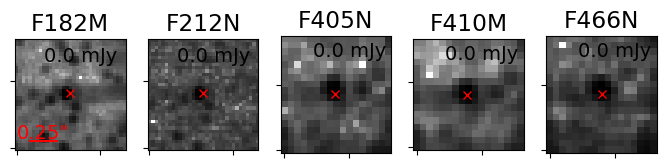

In [27]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][5]);

# This should be excluded because it's near saturated

starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][6]);

<Figure size 1200x400 with 0 Axes>

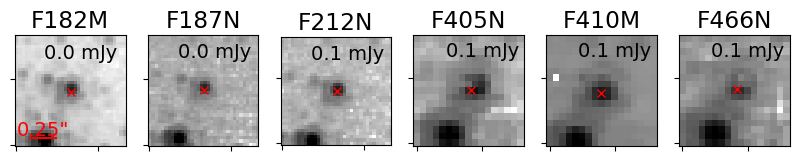

In [28]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][7]);

This source, at '17h46m03.34624067s -28d44m52.76835584s', is adjacent to a saturated source that isn't marked as saturated

In [29]:
basetable['skycoord_f410m'][blue_410_466 & ~badblue][8].to_string('hmsdms')

'17h46m03.17514595s -28d42m10.99375386s'

<Figure size 1200x400 with 0 Axes>

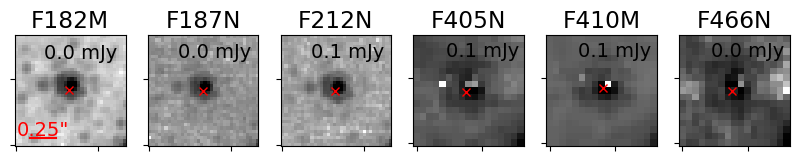

In [30]:
starzoom(basetable['skycoord_f410m'][blue_410_466 & ~badblue][8]);

<Figure size 1200x400 with 0 Axes>

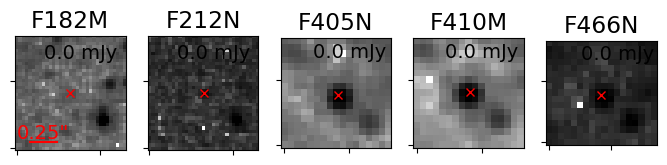

In [31]:
# long-wavelength detected, short-wavelength nondetected?
starzoom(coordinates.SkyCoord(266.54174, -28.74907, unit=(u.deg, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

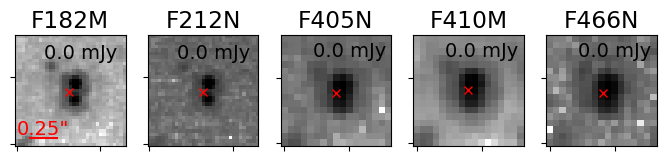

In [32]:
# nice little binary pair
starzoom(coordinates.SkyCoord("17:46:10.006 -28:44:21.00", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

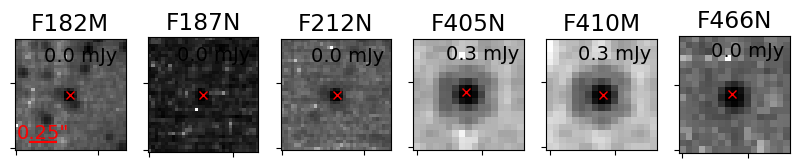

In [33]:
starzoom(coordinates.SkyCoord("17:46:10.678 -28:42:23.73", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

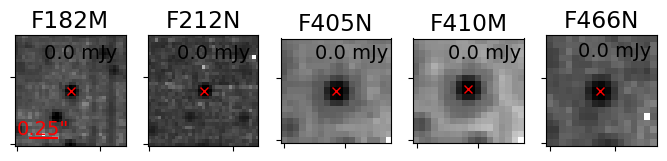

In [34]:
starzoom(coordinates.SkyCoord("17:46:09.303 -28:44:08.85", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

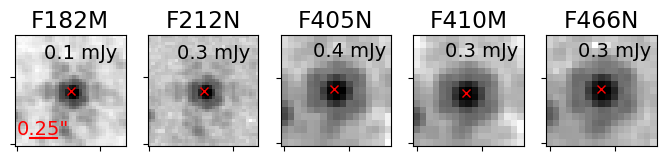

In [35]:
starzoom(coordinates.SkyCoord("17:46:09.25 -28:44:11.05", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

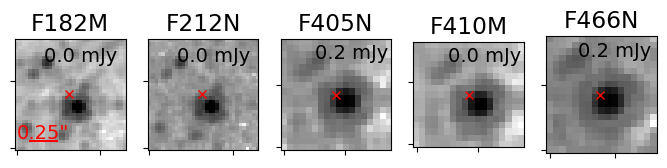

In [36]:
# a few pixels offset as of Feb 11, 2023
starzoom(coordinates.SkyCoord("17:46:03.833 -28:42:59.76", unit=(u.hour, u.deg), frame='icrs'));

<Figure size 1200x400 with 0 Axes>

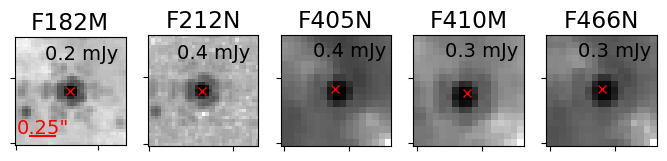

In [37]:
starzoom(coordinates.SkyCoord("17:46:07.373 -28:45:29.28", unit=(u.hour, u.deg), frame='icrs'));